# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [14]:
import pandas as pd
import numpy as np
import random
import math

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.37965242, 0.87960957, 0.86964474])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [10]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-x}}$

In [15]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1 / (1+math.exp(-z))
    return p

In [16]:
logistic(X_train.iloc[1], parameters)

0.8116428099439732

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(\theta) = -\frac{1}{m}\sum_{i=1}^{m} \left[ y^{(i)} \log\left( h_\theta(x^{(i)}) \right) + (1 - y^{(i)}) \log\left( 1 - h_\theta(x^{(i)}) \right) \right] $ 

In [26]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -y * math.log(p) - (1-y) * math.log(1-p)
    return loss

In [27]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters)
    loss = (y-y_hat)**2
    return loss

In [28]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [29]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.3436805700053172

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$ 
## ${\partial\over{\partial \theta_j}}l(p)= \nabla l(p) = \frac{1}{m} \sum_{i=1}^{m} \left( h_p(x^{(i)}) - y^{(i)} \right) \mathbf{x}^{(i)}$ 

In [32]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = (y_hat-y)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = (p-y) * X[j]
    return gradient

In [33]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.11470672963937743

In [34]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [44]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients[j]

In [45]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

53.15971413395222

## mini-batch
인덱스로 미니 배치 나누기

In [46]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_size로 정확하게 나누어 지지 않더라도 +1을 해서 모든 데이터 포인트가 배치에 포함되도록 하였습니다. 그 다음 배치 인덱스를 저장할 리스트를 구성합니다. 슬라이싱으로 i번째 배치에 대한 데이터를 가져올 수 있습니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [51]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    gradients = np.array(gradients)
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [52]:
step(parameters, gradients1, 0.01, len(X_train))

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: "..."  
SGD: "..."  
MGD: "..."  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> "..."  
batch_size=k -> "..."  
batch_size=whole -> "..."  

In [53]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = parameters - (learning_rate * np.array(gradients) / len(idx))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(idx))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [55]:
learning_rate = 0.01
num_epoch = 1000
tolerance = 0.00001
model = 'logistic'  # You can choose 'logistic' for logistic regression or 'linear' for linear regression
batch_size = 16

In [56]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate,num_epoch,tolerance,model,batch_size)
new_param_bgd

epoch: 0  loss: 1.7092772820544093  params: [0.94290762 0.65779928 0.34265737]  gradients: 4.4960439766347715
epoch: 100  loss: 0.5701593889495097  params: [ 0.19352812 -0.09158023 -0.40672213]  gradients: 2.112230429472249
epoch: 200  loss: 0.5599786248956186  params: [ 0.18137548 -0.10373286 -0.41887477]  gradients: 2.0648832794992016
epoch: 300  loss: 0.5597941043008633  params: [ 0.1811521  -0.10395624 -0.41909815]  gradients: 2.064017962375194
epoch: 400  loss: 0.5597906914297556  params: [ 0.18114797 -0.10396037 -0.41910228]  gradients: 2.0640019551494757
epoch: 500  loss: 0.5597906282820088  params: [ 0.18114789 -0.10396045 -0.41910235]  gradients: 2.064001658969797
epoch: 600  loss: 0.5597906271135892  params: [ 0.18114789 -0.10396045 -0.41910236]  gradients: 2.064001653489599
epoch: 700  loss: 0.5597906270919696  params: [ 0.18114789 -0.10396045 -0.41910236]  gradients: 2.064001653388198
epoch: 800  loss: 0.5597906270915697  params: [ 0.18114789 -0.10396045 -0.41910236]  gradi

array([ 0.18114789, -0.10396045, -0.41910236])

In [57]:
new_param_sgd = gradient_descent(X_train, y_train,learning_rate,num_epoch,tolerance,model,batch_size)
new_param_sgd

epoch: 0  loss: 1.6161855916119547  params: [0.96313306 0.3745403  0.42481493]  gradients: 4.422256189624308


array([ 0.43976614, -0.14882662, -0.098552  ])

In [58]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate,num_epoch,tolerance,model,batch_size)
new_param_mgd

epoch: 0  loss: 1.3452321708497472  params: [0.63583934 0.34724836 0.35568705]  gradients: 4.132747586593097
epoch: 100  loss: 0.5365442374493554  params: [ 0.0163457  -0.27224529 -0.2638066 ]  gradients: 1.8881980192483308
epoch: 200  loss: 0.5291165800973081  params: [ 0.00588883 -0.28270215 -0.27426347]  gradients: 1.8498690939108613
epoch: 300  loss: 0.5289655326550549  params: [ 0.00567329 -0.2829177  -0.27447901]  gradients: 1.8490842849491862
epoch: 400  loss: 0.5289623996528853  params: [ 0.00566882 -0.28292217 -0.27448348]  gradients: 1.8490680042844798
epoch: 500  loss: 0.5289623346420459  params: [ 0.00566873 -0.28292226 -0.27448357]  gradients: 1.8490676664542778
epoch: 600  loss: 0.5289623332930377  params: [ 0.00566872 -0.28292226 -0.27448357]  gradients: 1.8490676594441282
epoch: 700  loss: 0.528962333265045  params: [ 0.00566872 -0.28292226 -0.27448357]  gradients: 1.8490676592986635
epoch: 800  loss: 0.5289623332644643  params: [ 0.00566872 -0.28292226 -0.27448357]  gr

array([ 0.00566872, -0.28292226, -0.27448357])

### Predict Label

In [59]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [60]:
from sklearn.metrics import *

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[22, 18],
       [ 6,  4]], dtype=int64)

In [62]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.52


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [63]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [64]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [65]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.46681346, 2.47569008])

In [68]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate,num_epoch,tolerance,model,batch_size)
new_param

epoch: 0  loss: -0.06016895152668422  params: [0.11422273 0.62775907]  gradients: -5.751560648747889
epoch: 100  loss: -8.167391376250999  params: [5.43823732 5.95177365]  gradients: -4.459941811036184
epoch: 200  loss: -15.45248215456396  params: [10.52633444 11.03987077]  gradients: -4.459268880084492
epoch: 300  loss: -22.736651439826346  params: [15.61423511 16.12777144]  gradients: -4.459268115117258


ValueError: math domain error

In [67]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

NameError: name 'new_param' is not defined

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

NameError: name 'y_hat_GD' is not defined

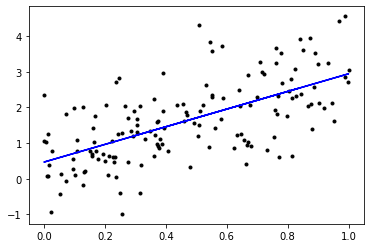

In [69]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()